In [21]:
import matplotlib.pyplot as plt

class Node:
    def __init__(self, point, left=None, right=None):
        self.point = point
        self.left = left
        self.right = right

def build_kdtree(points, depth=0):
    if not points:
        return None
    
    # Select axis based on depth so that axis cycles over all valid values
    k = len(points[0])  # Assumes all points have the same dimension
    axis = depth % k
    
    # Sort point list and choose median as pivot element
    points.sort(key=lambda x: x[axis])
    median = len(points) // 2
    
    # Create node and construct subtrees
    return Node(
        point=points[median],
        left=build_kdtree(points[:median], depth + 1),
        right=build_kdtree(points[median + 1:], depth + 1),
    )

def closest_point(root, target, depth=0, best=None):
    if root is None:
        return best
    
    k = len(target)
    axis = depth % k
    
    next_best = None
    next_branch = None
    
    if best is None or distance_squared(target, root.point) < distance_squared(target, best):
        next_best = root.point
    else:
        next_best = best
    
    if target[axis] < root.point[axis]:
        next_branch = closest_point(root.left, target, depth + 1, next_best)
        if next_branch and distance_squared(target, next_branch) < distance_squared(target, next_best):
            next_best = next_branch
        next_branch = closest_point(root.right, target, depth + 1, next_best)
    else:
        next_branch = closest_point(root.right, target, depth + 1, next_best)
        if next_branch and distance_squared(target, next_branch) < distance_squared(target, next_best):
            next_best = next_branch
        next_branch = closest_point(root.left, target, depth + 1, next_best)
    
    if next_branch and distance_squared(target, next_branch) < distance_squared(target, next_best):
        return next_branch
    else:
        return next_best

def distance_squared(point1, point2):
    return sum((p1 - p2) ** 2 for p1, p2 in zip(point1, point2))


def plot_kdtree(node, min_x, max_x, min_y, max_y, depth=0):
    if node is None:
        return
    
    # Determine the axis and the next min/max for the partitions
    axis = depth % 2
    if axis == 0:
        plt.plot([node.point[0], node.point[0]], [min_y, max_y], 'r-')
        plot_kdtree(node.left, min_x, node.point[0], min_y, max_y, depth + 1)
        plot_kdtree(node.right, node.point[0], max_x, min_y, max_y, depth + 1)
    else:
        plt.plot([min_x, max_x], [node.point[1], node.point[1]], 'b-')
        plot_kdtree(node.left, min_x, max_x, min_y, node.point[1], depth + 1)
        plot_kdtree(node.right, min_x, max_x, node.point[1], max_y, depth + 1)

def visualize_kdtree(points):
    tree = build_kdtree(points)
    min_x = min(points, key=lambda x: x[0])[0]
    max_x = max(points, key=lambda x: x[0])[0]
    min_y = min(points, key=lambda x: x[1])[1]
    max_y = max(points, key=lambda x: x[1])[1]
    
    margin = 1
    plt.figure(figsize=(10, 10))
    plt.xlim(min_x - margin, max_x + margin)
    plt.ylim(min_y - margin, max_y + margin)
    
    # Plot the points
    for point in points:
        plt.plot(point[0], point[1], 'ko')
    
    # Plot the KD-tree partitions
    plot_kdtree(tree, min_x - margin, max_x + margin, min_y - margin, max_y + margin)
    
    plt.show()


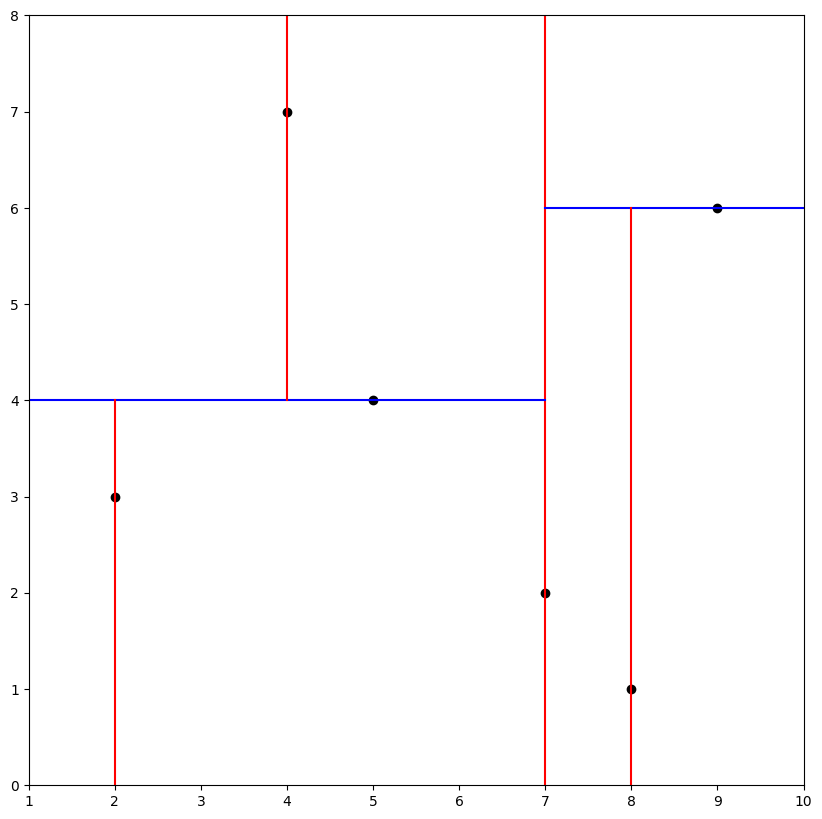

Nearest neighbor: (8, 1)


In [22]:
if __name__ == "__main__":
    points = [(2, 3), (5, 4), (9, 6), (4, 7), (8, 1), (7, 2)]
    visualize_kdtree(points)
    tree = build_kdtree(points)
    target = (9, 2)
    print("Nearest neighbor:", closest_point(tree, target))

In [29]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
import numpy as np

# Load the Iris dataset
iris = load_iris()
X = iris.data[:, 2:]  # we only take the last two features.
y = iris.target

In [30]:
# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=123)

# Fit the model with the data
clf.fit(X, y)

DecisionTreeClassifier(random_state=123)

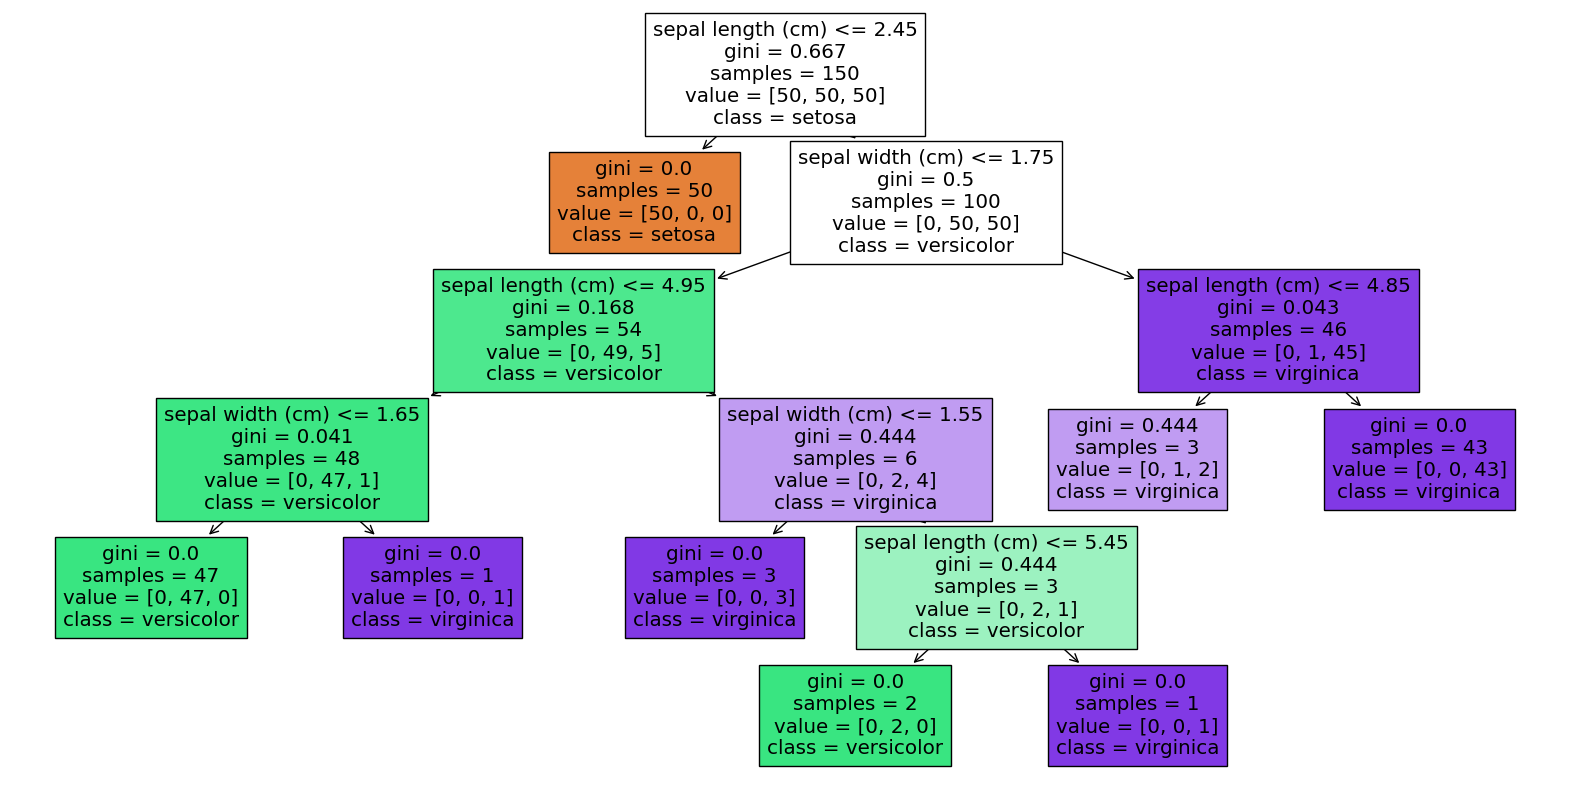

In [31]:
# Visualize the decision tree
plt.figure(figsize=(20,10))
plot_tree(clf, filled=True, feature_names=iris.feature_names, class_names=iris.target_names)
plt.show()

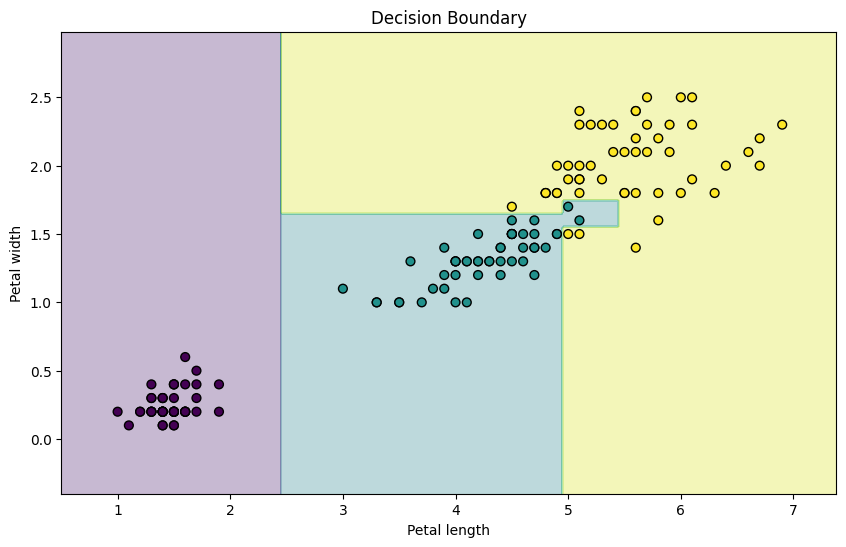

In [32]:
# Function to plot decision boundary
def plot_decision_boundary(clf, X, y, ax=None):
    if ax is None:
        ax = plt.gca()
        
    # Create a mesh grid
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))

    # Predict classifications for our grid
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the contour and training examples
    ax.contourf(xx, yy, Z, alpha=0.3)
    ax.scatter(X[:, 0], X[:, 1], c=y, s=40, edgecolor='k')
    ax.set_xlabel('Petal length')
    ax.set_ylabel('Petal width')
    ax.set_title('Decision Boundary')

# Plotting the decision boundary
plt.figure(figsize=(10, 6))
plot_decision_boundary(clf, X, y)
plt.show()

In [33]:
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

In [34]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)  # 70% training and 30% testing

In [35]:
# Create a Gaussian Classifier
clf = RandomForestClassifier(n_estimators=100)

# Train the model using the training sets
clf.fit(X_train, y_train)

RandomForestClassifier()

In [36]:
# Predict the response for the test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9555555555555556


In [37]:
import pandas as pd
import numpy as np

feature_imp = pd.Series(clf.feature_importances_,index=iris.feature_names).sort_values(ascending=False)
print(feature_imp)

petal width (cm)     0.455878
petal length (cm)    0.431087
sepal length (cm)    0.090048
sepal width (cm)     0.022987
dtype: float64


In [38]:
X = iris.data[:, 2:]  # we only take the last two features.
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)  # 70% training and 30% testing
clf = RandomForestClassifier(n_estimators=100)

# Train the model using the training sets
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9555555555555556


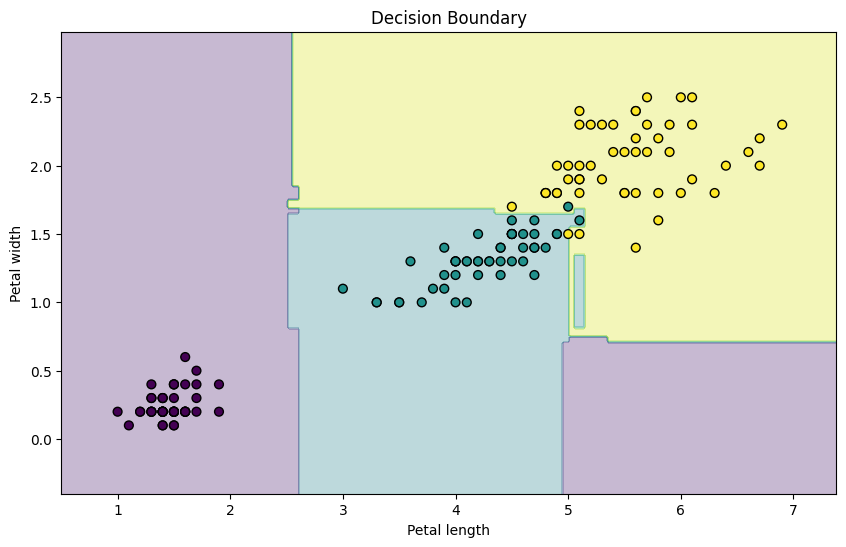

In [47]:
# Function to plot decision boundary
def plot_decision_boundary(clf, X, y, ax=None):
    if ax is None:
        ax = plt.gca()
        
    # Create a mesh grid
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))

    # Predict classifications for our grid
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    ax.contourf(xx, yy, Z, alpha=0.3)
    ax.scatter(X[:, 0], X[:, 1], c=y, s=40, edgecolor='k')
    ax.set_xlabel('Petal length')
    ax.set_ylabel('Petal width')
    ax.set_title('Decision Boundary')

# Plotting the decision boundary
plt.figure(figsize=(10, 6))
plot_decision_boundary(clf, X, y)
plt.show()

In [49]:
# Example petal length and width
petal_length = 6
petal_width = 0.5

# Predict using the trained Random Forest model
prediction = clf.predict([[petal_length, petal_width]])

# Translate the numerical prediction back to the original class name
predicted_class = iris.target_names[prediction][0]
print(f"The predicted class for a petal length of {petal_length} and petal width of {petal_width} is: {predicted_class}")

petal_length = 6
petal_width = 2
# Predict using the trained Random Forest model
prediction = clf.predict([[petal_length, petal_width]])

# Translate the numerical prediction back to the original class name
predicted_class = iris.target_names[prediction][0]
print(f"The predicted class for a petal length of {petal_length} and petal width of {petal_width} is: {predicted_class}")

The predicted class for a petal length of 6 and petal width of 0.5 is: setosa
The predicted class for a petal length of 6 and petal width of 2 is: virginica
